#### Importing all the required modules and libraries

In [1]:
%pip install tabulate
from tabulate import tabulate
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from typing import List

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Polynomial Regression,<small> and Evaluation using R-Squared, MAPE and MAE.</small>
-----------------------------
### Goal
We goal is to create a tool that predicts the chances of diabetes getting worse using Body Mass Index (BMI) feature within the dataset. This tool will help doctors identify patients who might be at risk.

The source of the data is from [stat.ncsu.edu](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) hosted on [Scikit-Learn: Diabetes (Toy Dataset)](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)
<hr style="height: 3px; background-color: black;">

In [2]:
X, y = load_diabetes(return_X_y=True, as_frame=True)


In [3]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

We can observe that the description for `sex` is missing, providing incomplete information.

In [4]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [6]:
combined_var = pd.concat([X,y] , axis=1)
combined_var.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


We have information about individuals which including their age, sex, body mass index (BMI), blood pressure (bp), and several other factors:

- Count: The dataset has 442 entries

- Mean: The average age is effectively zero, and similar patterns are observed for other features due to standardization.

- Standard Deviation (Std): Values around 0.05 show that the data is tightly packed around the mean.

- Minimum and Maximum (Min, Max): The minimum age is -0.107, and the maximum target value is 346, which points towards a range of health conditions.

- Percentiles (25%, 50%, 75%): Most individuals fall within certain percentiles for each feature, providing insights into the distribution.

- Target (Health Metric): The target variable has a mean of 152.13 and a diverse range, which is indicated by the high standard deviation.

In [7]:
combined_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


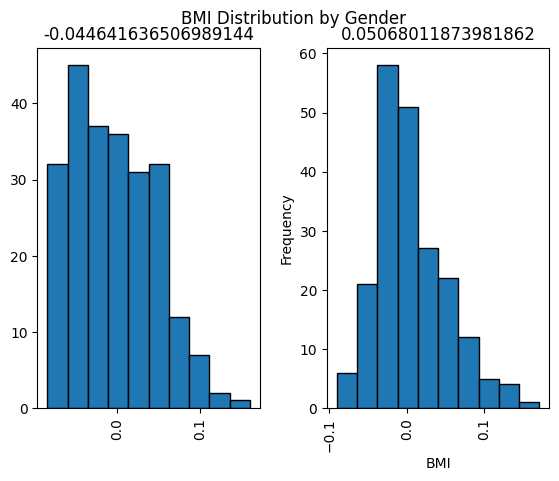

In [8]:
# Plot histogram
X.hist(column="bmi", by="sex", edgecolor='black')

# Set plot labels and title
plt.suptitle("BMI Distribution by Gender")
plt.xlabel("BMI")
plt.ylabel("Frequency")

# Show the plot
plt.show()


We can see that the two graphs generated are based on sex but we cannot clearly identify which represents males/females and we can never proceed based on our intuition hence the relation between `BMI` and `Sex` cannot be utilized for analysis.


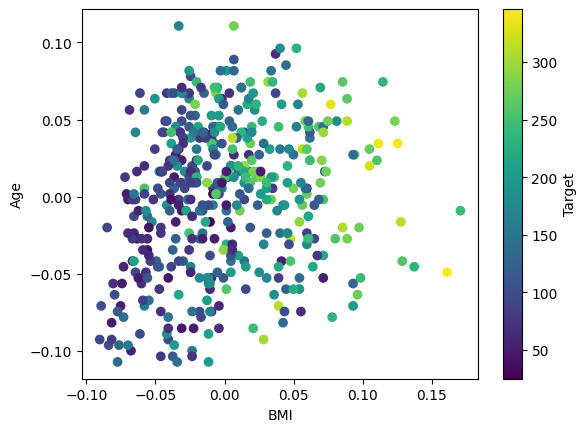

In [9]:
plt.scatter(x = combined_var["bmi"], y = combined_var["age"], c=combined_var["target"], cmap='viridis' )

plt.xlabel('BMI')
plt.ylabel('Age')
plt.colorbar(label='Target')

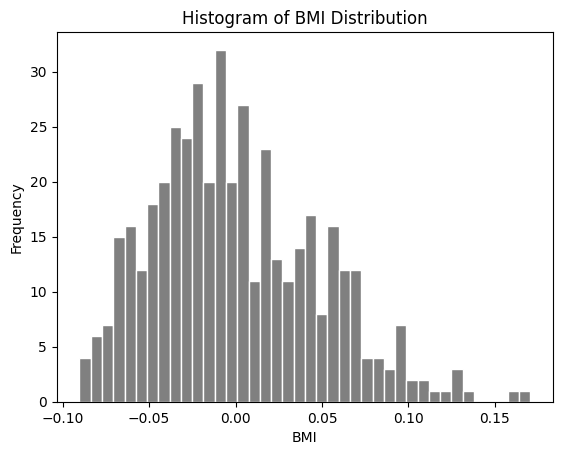

In [10]:
# Create histograms for BMI
plt.hist(X["bmi"], bins=40, color='grey', edgecolor='white')
plt.title('Histogram of BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

* We can observe that the scaled down version of mean BMI is the highest around 0, this indicates that the dataset is modified according to the machine learning model and this improves the accuracy of the trained model. It is helpful in the scenarios where the features are sensitive.

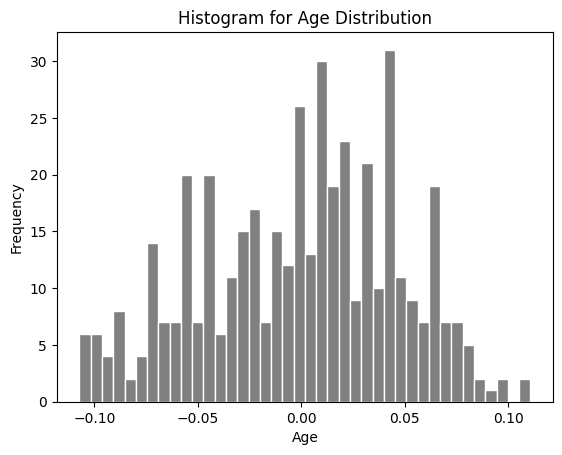

In [11]:
# Create histograms for Age
plt.hist(X["age"], bins=40, color='grey', edgecolor='white')
plt.title('Histogram for Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* We can observe that their is an even distribution of scaled age values from -0.5 to 0.5 which suggests a centralization around 0 which is a common outcome of scaling methods like standardization contributing to a more balanced and standardized representation of the age feature.

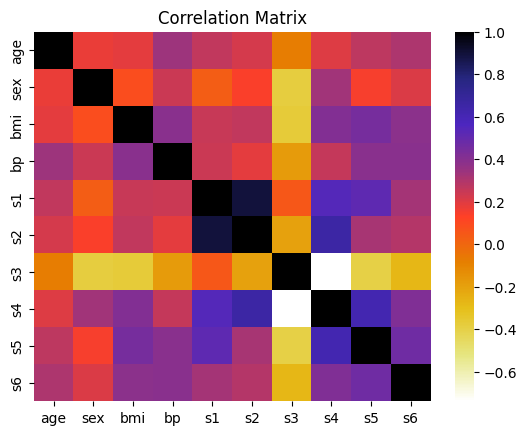

In [12]:
corr_matrix = X.corr()

sns.heatmap(corr_matrix, cmap=plt.cm.CMRmap_r)
plt.title("Correlation Matrix")
plt.show()


* We can notice from the heatmap that s3 and s4 are strongly linked, suggesting they are correlated, perhaps related to health.

* Age, (s1) and s2 show a strong inverse relationship – as age rises, s2 tends to decrease, indicating a health connection.

* Additionally, body mass index (bmi) moderately aligns with s4 and s5, and blood pressure (bp) moderately correlates with Age and (s1).

* The heatmap reveals connections among various features simplifying the comprehension of these complex relationships.

<hr style="height: 3px; background-color: black;">

### Data Cleaning

In [13]:
if X.isnull().any().any() or y.isnull().any().any():
    print("Yes")
else:
    print("No Null Values present in the dataset.")

print(X.isnull().sum())


No Null Values present in the dataset.
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


* We do not have any null or NaN values in our dataset which makes it easier for us as there is no specific requirement for cleaning the dataset.

* If needed we would have to perform an in-dept analysis of any of the outliers which they affect in the prediction of the model outcome.

<hr style="height: 3px; background-color: black;">

### Splitting the Dataset: <small> Train, Validation and Test </small>

In [14]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
X = X["bmi"]

X = X.values.reshape(-1, 1) if isinstance(X, pd.Series) else X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def create_polynomial_model(degree, X, y):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    
    return model, X_poly

In [15]:
print(f"X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"First 5 rows of X:")
print(X[:5])
print(f"First 5 rows of X_train:")
print(X_train[:5])

X shape: (442, 1)
X_train shape: (309, 1)
First 5 rows of X:
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]
First 5 rows of X_train:
[[ 0.03259528]
 [ 0.08540807]
 [-0.0105172 ]
 [ 0.11019775]
 [-0.00620595]]


In [16]:
degrees = [3, 8]
for degree in degrees:
    linear_model = make_pipeline(PolynomialFeatures(1), LinearRegression())


print(linear_model)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])


<hr style="height: 3px; background-color: black;">

### Creating PipeLines

In [17]:
all_pipelines = [
    [
        ('linear_regression_degree_0', Pipeline([
            ('Poly', PolynomialFeatures(degree=0)),
            ('regression', LinearRegression())
        ])),
        ('linear_regression_degree_1', Pipeline([
            ('Poly', PolynomialFeatures(degree=1)),
            ('regression', LinearRegression())
        ])),
        ('linear_regression_degree_2', Pipeline([
            ('Poly', PolynomialFeatures(degree=2)),
            ('regression', LinearRegression())
        ])),
        ('linear_regression_degree_3', Pipeline([
            ('Poly', PolynomialFeatures(degree=3)),
            ('regression', LinearRegression())
        ])),
        ('linear_regression_degree_4', Pipeline([
            ('Poly', PolynomialFeatures(degree=4)),
            ('regression', LinearRegression())
        ])),


        ('tree_depth_1', Pipeline([
            ('decision_tree', DecisionTreeRegressor(max_depth=1, criterion='squared_error'))
        ])),
        ('tree_depth_2', Pipeline([
            ('decision_tree', DecisionTreeRegressor(max_depth=2, criterion='squared_error'))
        ])),
        ('tree_depth_3', Pipeline([
            ('decision_tree', DecisionTreeRegressor(max_depth=3, criterion='squared_error'))
        ])),
        ('tree_depth_4', Pipeline([
            ('decision_tree', DecisionTreeRegressor(max_depth=4, criterion='squared_error'))
        ])),
        ('tree_depth_5', Pipeline([
            ('decision_tree', DecisionTreeRegressor(max_depth=5, criterion='squared_error'))
        ])),


        ('knn_neighbors_1', Pipeline([
            ('knn', KNeighborsRegressor(n_neighbors=1))
        ])),
        ('knn_neighbors_2', Pipeline([
            ('knn', KNeighborsRegressor(n_neighbors=2))
        ])),
        ('knn_neighbors_3', Pipeline([
            ('knn', KNeighborsRegressor(n_neighbors=3))
        ])),
        ('knn_neighbors_4', Pipeline([
            ('knn', KNeighborsRegressor(n_neighbors=4))
        ])),
        ('knn_neighbors_5', Pipeline([
            ('knn', KNeighborsRegressor(n_neighbors=5))
        ])),
        ('knn_neighbors_6', Pipeline([
            ('knn', KNeighborsRegressor(n_neighbors=6))
        ])),
        ('knn_neighbors_7', Pipeline([
            ('knn', KNeighborsRegressor(n_neighbors=7))
        ]))
    ]
]

for pipeline_group in all_pipelines:
    for name, pipe in pipeline_group:
        print(f"{name} ✔")

linear_regression_degree_0 ✔
linear_regression_degree_1 ✔
linear_regression_degree_2 ✔
linear_regression_degree_3 ✔
linear_regression_degree_4 ✔
tree_depth_1 ✔
tree_depth_2 ✔
tree_depth_3 ✔
tree_depth_4 ✔
tree_depth_5 ✔
knn_neighbors_1 ✔
knn_neighbors_2 ✔
knn_neighbors_3 ✔
knn_neighbors_4 ✔
knn_neighbors_5 ✔
knn_neighbors_6 ✔
knn_neighbors_7 ✔


<hr style="height: 3px; background-color: black;">

### cross_validate Function

In [23]:
import pandas as pd
from IPython.display import display, HTML
from tabulate import tabulate

# Initialize an empty list to store results DataFrames
results_dfs = []

# Iterate through all pipelines
for cur_pipeline in all_pipelines:
    for name, pipeline in cur_pipeline:
        pipeline.fit(X, y)
        linear_predictions = pipeline.predict(X)
        mean_pred = np.mean(linear_predictions)
        std_pred = np.std(linear_predictions)

        results = []
        scoring = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']

        # Perform cross-validation
        cv_results = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

        results.append({
            'Model': name,
            'Mean': mean_pred,
            'Std Deviation': std_pred,
            'R^2': np.round(cv_results['test_r2'].mean(), 2),
            'Mean R^2': np.mean(cv_results['test_r2']),
            'STD R^2': np.std(cv_results['test_r2']),
            'MAE': np.round(-cv_results['test_neg_mean_absolute_error'].mean(), 2),
            'Mean MAE': np.mean(-cv_results['test_neg_mean_absolute_error']),
            'STD MAE': np.std(-cv_results['test_neg_mean_absolute_error']),
            'MAPE': np.round(-cv_results['test_neg_mean_absolute_percentage_error'].mean(), 2),
            'Mean MAPE': np.mean(-cv_results['test_neg_mean_absolute_percentage_error']),
            'STD MAPE': np.std(-cv_results['test_neg_mean_absolute_percentage_error']),
        })

        # Convert results to a DataFrame
        results_df = pd.DataFrame(results)
        results_dfs.append(results_df)

# Combine all the results into a single DataFrame
combined_results = pd.concat([results_df.set_index('Model').transpose() for results_df in results_dfs], axis=1)

# Convert the DataFrame to HTML with a fixed height and scrollable overflow
html_output = combined_results.to_html()
html_output_with_scroll = f'<div style="overflow: auto;">{html_output}</div>'

# Display the HTML output
display(HTML(html_output_with_scroll))


Model,linear_regression_degree_0,linear_regression_degree_1,linear_regression_degree_2,linear_regression_degree_3,linear_regression_degree_4,tree_depth_1,tree_depth_2,tree_depth_3,tree_depth_4,tree_depth_5,knn_neighbors_1,knn_neighbors_2,knn_neighbors_3,knn_neighbors_4,knn_neighbors_5,knn_neighbors_6,knn_neighbors_7
Mean,152.133484,152.133484,152.133484,152.133484,152.133484,152.133484,152.133484,152.133484,152.133484,152.133484,153.404977,149.209276,153.518100,151.275452,152.832127,153.791478,152.351325
Std Deviation,0.000000,45.160030,45.168382,45.238631,45.269620,40.629055,46.610523,47.506935,49.182909,50.807723,76.199585,65.341184,57.982039,55.371836,52.073620,51.324034,49.516914
R^2,-0.040000,0.330000,0.320000,0.310000,0.310000,0.220000,0.280000,0.210000,0.170000,0.160000,-0.320000,0.050000,0.120000,0.160000,0.190000,0.200000,0.200000
Mean R^2,-0.039901,0.325389,0.323149,0.313246,0.309457,0.216415,0.278903,0.211986,0.166615,0.160113,-0.317782,0.048065,0.115535,0.160867,0.189674,0.202146,0.201185
STD R^2,0.048473,0.104926,0.107410,0.111920,0.107919,0.113933,0.133623,0.169962,0.188548,0.172641,0.244891,0.232515,0.183549,0.153591,0.164308,0.157810,0.160059
MAE,67.170000,52.520000,52.640000,53.160000,53.410000,56.910000,54.100000,56.190000,57.730000,58.510000,72.880000,60.850000,59.640000,57.610000,56.630000,56.320000,56.240000
Mean MAE,67.170145,52.515556,52.639916,53.155698,53.413325,56.911327,54.101503,56.185211,57.726150,58.513171,72.879270,60.851824,59.635131,57.610616,56.633189,56.317627,56.244005
STD MAE,7.652792,3.417087,3.562905,3.510178,3.177465,2.108040,3.273490,3.776057,3.881955,4.124725,3.320298,4.665748,4.940275,3.493394,2.420829,2.680164,2.595632
MAPE,0.640000,0.490000,0.490000,0.490000,0.490000,0.510000,0.490000,0.510000,0.530000,0.530000,0.660000,0.550000,0.530000,0.510000,0.510000,0.510000,0.500000
Mean MAPE,0.641334,0.487092,0.487766,0.492623,0.492287,0.513628,0.494736,0.510235,0.526845,0.529909,0.659603,0.552965,0.529561,0.512574,0.507101,0.505795,0.503919


From the table of calculations for all the models considered, these are the following interpretations:
* Linear Regression:
    - We can observe that with increasing degree of polynomial regression from 0 to 1 leads to improvements in model performance (-0.04 to 0.33). This suggests that the linear model (degree 0) might be too simplistic to capture the underlying relationships in the data adequately.

    - However, beyond degree 1, the improvements in R^2 become less, with degrees 2, 3, and 4 showing only marginal increases in R^2 compared to degree 1. This shows that when we make the model more complicated beyond a certain point, the improvements become smaller.

    - The increasing standard deviation in R^2 and mean absolute error (MAE) as the polynomial degree increases suggests a higher variability in model performance, which could be indicative of overfitting.

* Tree Depth:

    - Increasing tree depth initially improves model performance, as evidenced by higher R^2 scores. However, beyond a certain point, further increases in tree depth lead to diminishing returns and may even result in decreased model performance.

    - Models with higher tree depths showcase higher variability in performance metrics such as R^2, MAE, and MAPE, which suggests higher models may be less stable and more sensitive to variations in the training data.

    - There ideal level of the model is around a tree depth of 2. At this point, the model effectively captures patterns in the data while preventing overfitting. This is evident in the higher R^2 scores and lower error metrics observed at this depth.

* K Nearest Neighbors:

    - The performance of the k-NN models varies depending on the number of neighbors considered. Generally, as the number of neighbors increases, the model's predictive performance improves, as indicated by higher R^2 scores and lower error metrics (MAE, MAPE).

    - There seems to be an optimal number of neighbors, typically around 5 or 6, where the model achieves the best balance between bias and variance. This is reflected in the highest R^2 scores and the lowest error metrics at these neighbor counts.

<hr style="height: 3px; background-color: black;">

### Identifying Best Model

In [19]:
best_model = None
best_mean_mape = float('inf')
best_mean_mae = float('inf')
best_mean_r2 = float('-inf')
best_model_name = ""

for current_pipeline in all_pipelines:
    for name, pipeline in current_pipeline:
        pipeline.fit(X_train, y_train)
        linear_predictions = pipeline.predict(X_train)

        scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2']
        results = []

        cv_results = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=5, return_train_score=True)

        mean_mape = np.mean(-cv_results['test_neg_mean_absolute_percentage_error'])
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_mae = np.mean(-cv_results['test_neg_mean_absolute_error'])

        # print(f"mean_r2: {mean_r2:.2f}")
        # print(f"mean_mape: {mean_mape:.2f}")
        # print(f"mean_mae: {mean_mae:.2f}")
        # print()

        if mean_r2 > best_mean_r2 or (mean_r2 == best_mean_r2 and
                                       mean_mape < best_mean_mape) or (mean_r2 == best_mean_r2 and
                                                                        mean_mape == best_mean_mape and
                                                                          mean_mae < best_mean_mae):
            best_model_name = name
            best_model = pipeline
            best_mean_mae = mean_mae
            best_mean_mape = mean_mape
            best_mean_r2 = mean_r2

test_predictions = best_model.predict(X_test)
best_model.fit(X_train, y_train)
test_r2 = best_model.score(X_test, y_test)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mape = mean_absolute_percentage_error(y_test, test_predictions)

print(f"Best Model: {best_model_name}\nTest Set Results:")
print(f"\tR-Squared : {test_r2:.2f}")
print(f"\tMAPE      : {test_mape:.2f}")
print(f"\tMAE       : {test_mae:.2f}")


Best Model: linear_regression_degree_1
Test Set Results:
	R-Squared : 0.28
	MAPE      : 0.44
	MAE       : 50.59


<hr style="height: 3px; background-color: black;">

### Plotting Graph on Data Points

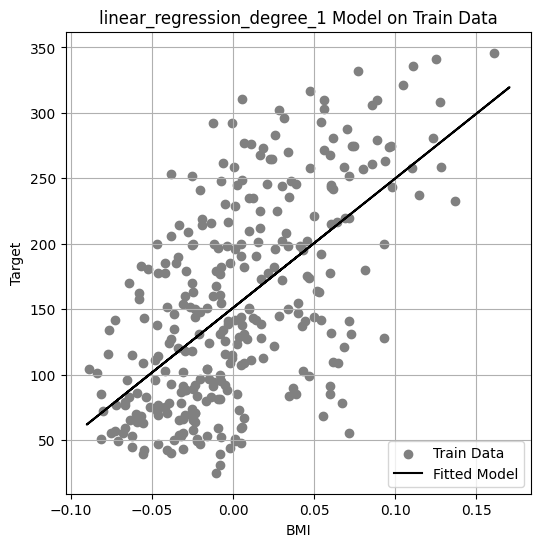

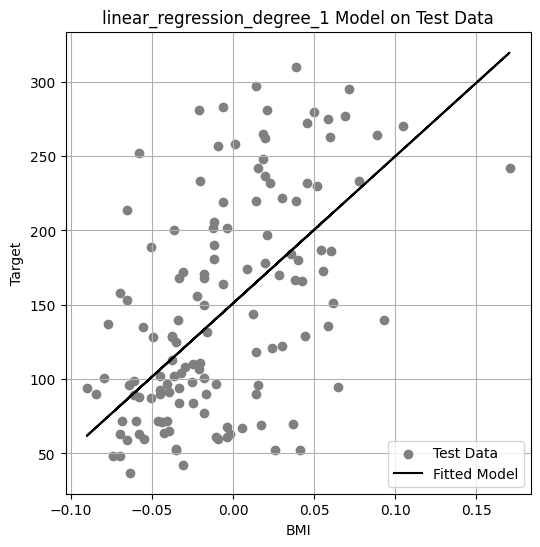

In [20]:
all_predictions = best_model.predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train, color='grey', label='Train Data')
plt.plot(X, all_predictions, color='black', label='Fitted Model')
plt.ylabel('Target')
plt.xlabel('BMI')
plt.title(f'{best_model_name} Model on Train Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_test, y_test, color='grey', label='Test Data')
plt.plot(X, all_predictions, color='black', label='Fitted Model')
plt.ylabel('Target')
plt.xlabel('BMI')
plt.title(f'{best_model_name} Model on Test Data')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<hr style="height: 3px; background-color: black;">

## Conclusion

The analysis reveals that linear regression models with polynomial degree 1 perform the best, showing a good balance of simplicity and accuracy. However, these models struggle with capturing complex non-linear relationships.

Decision tree models show moderate performance but do not significantly improve with increasing depth, indicating limitations in capturing complex interactions.

k-Nearest Neighbors (k-NN) models improve with more neighbors but suffer from high computational costs and struggle in high-dimensional spaces.

#### Chosen Model: Polynomial Regression (Degree: 1)
Linear Polynomial with degree one, outperforms other polynomial degrees as it strikes a balance between simplicity and accuracy. Models with higher polynomial degrees tend to overfit the data.

However, the model has it's own limitations which are that it assumes a linear relationship between the features and the target variable, which might not hold true.

It achieves a mean R-squared value of approximately 0.33, meaning 33% of the variance in the target variable is explained by the model. The mean absolute error (MAE) shows there is an average deviation of 52.52 units between the actual and predicted values. The mean absolute percentage error (MAPE), an average percentage deviation is of 49%.

Therefore, it's essential to consider its limitations and explore other modeling techniques for more accurate predictions.